# Problem statement (Term Deposit Sale)

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('ignore')

from sklearn.tree import DecisionTreeClassifier
from yellowbrick.classifier import ClassificationReport, ROCAUC

#pd.options.display.float_format = '{:,.3f}'.format

In [2]:
# Reading Data Set
data= pd.read_csv('bank-full.csv')

In [3]:
# Printing 5 rows of Data Set
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Data Set Information:

The data is related with direct marketing campaigns of a Portuguese banking institution.  
The marketing campaigns were based on phone calls. 
Often, more than one contact to the  same client was required, 
in order to access if the product (bank term deposit) would
be ('yes') or not ('no') subscribed.

Goal :
The classification goal is to predict if the client will subscribe (yes/no) a term deposit 

Resources Available
The historical data for this project is available in file
https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

# Attribute Information:

Input variables:
## Bank client data:
1. age: Continuous feature
2. job: Type of job (management, technician, entrepreneur, blue-collar, etc.)
3. marital: marital status (married, single, divorced)
4. education: education level (primary, secondary, tertiary)
5. default: has credit in default?
6. housing: has housing loan?
7. loan: has personal loan?
8. balance in account

## Related with the previous contact of the current campaign:
9. contact: contact communication type
10. month: last contact month of year
11. day: last contact day of the month
12. duration: last contact duration, in seconds

## Other attributes:
13. campaign: number of contacts performed during this campaign and for this client
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (-1 tells us the person has not been contacted or contact period is beyond 900 days)
15. previous: number of contacts performed before this campaign and for this client
16. poutcome: outcome of the previous marketing campaign

## Output variable (desired target):
17. Target: Tell us has the client subscribed a term deposit. (Yes, No)

In [4]:
# Number of rows and column
data.shape 

(45211, 17)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


- There are some Numerical and Non Numerical datatypes

In [6]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

- There are no Null Values in dataset

# Univariate Analysis

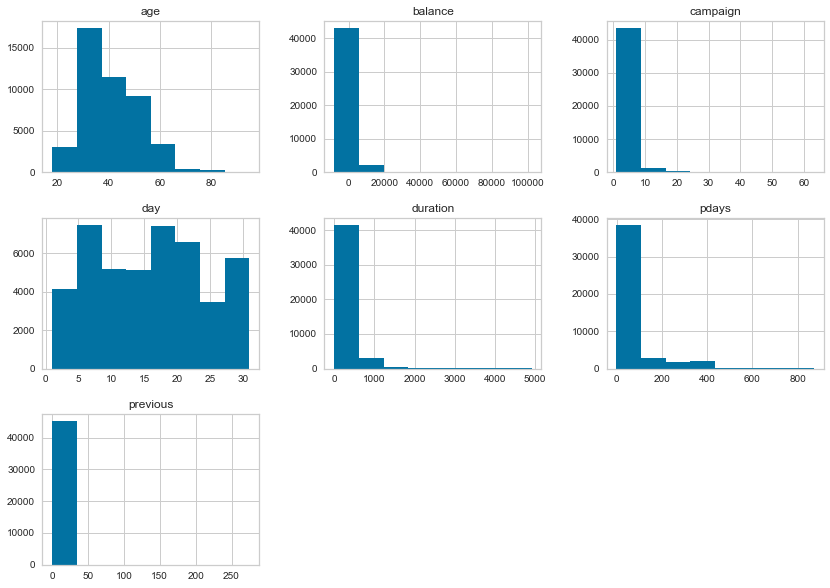

In [7]:
# Distribution of Numerical Data

data.hist(bins=8, figsize=(14,10))
plt.show()

In [8]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### - Detail information of Attributes Mean , Median etc. of dataset 
- Balance has minimum value of -8019. 
- There are many negative values in balance. It can be either typing mistake or actual bank    calculation
- Hence we can proceed either making necessary correction or considering all negative values as correct. We proceed considering as correct values.

In [9]:
# Outlier Detection using Inter Quartile Range

q3 = data.quantile(0.75)
q1 = data.quantile(0.25)
iqr = q3 - q1
print('IQR ')
print(iqr)
print('---------------------------------------\n')

data_out = data[~((data< (q1 - 1.5 * iqr)) |(data > (q3 + 1.5 * iqr))).any(axis=1)]
print('{} points are outliers based on IQR'.format(data.shape[0] - data_out.shape[0]))

IQR 
age           15.0
balance     1356.0
day           13.0
duration     216.0
campaign       2.0
pdays          0.0
previous       0.0
dtype: float64
---------------------------------------

17018 points are outliers based on IQR


In [10]:
cols=['job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month',  'poutcome', 'Target']
for cols in cols:
    print('------',cols,'------')
    print(data[cols].value_counts())
    print()

------ job ------
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

------ marital ------
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

------ education ------
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

------ default ------
no     44396
yes      815
Name: default, dtype: int64

------ housing ------
yes    25130
no     20081
Name: housing, dtype: int64

------ loan ------
no     37967
yes     7244
Name: loan, dtype: int64

------ contact ------
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

------ month ------
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403


- More number of customers are from : blue-collar ,management ,technician ,admin. ,services
- Nearly 50 % customers are married
- More number of customers are from Tertiaty and Secondary education background
- Aprox 2% customers are deafulted
- Aprox 50% customers have housing Loan
- Aprox 80% customers do not have loan
- Most of customers are contacted in May Month

Value Counts of Target 
no     39922
yes     5289
Name: Target, dtype: int64

Value Counts of Target %
no     88.30152
yes    11.69848
Name: Target, dtype: float64


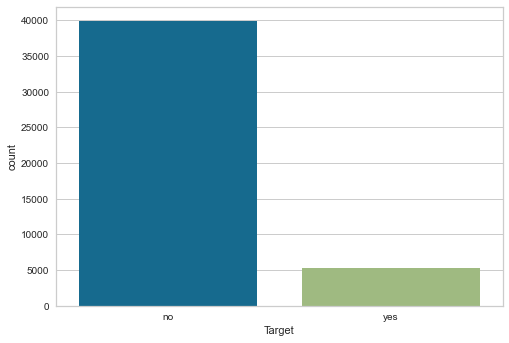

In [11]:
print('Value Counts of Target ')
print(data.Target.value_counts())
print()
print('Value Counts of Target %')
print(data.Target.value_counts(normalize=True)*100)
sns.countplot(data['Target'])

- only 12 % have Term Deposit
- Data is highly imbalanced

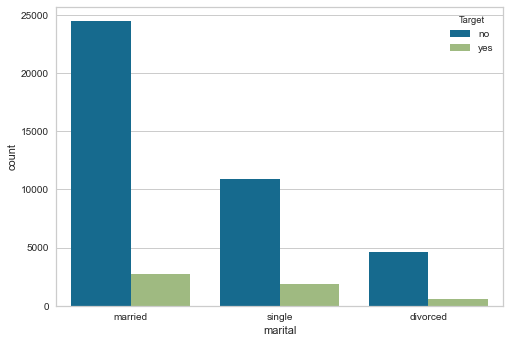

In [12]:
sns.countplot(x='marital',data=data, hue='Target')

- More number of customers having Term Deposit are Married

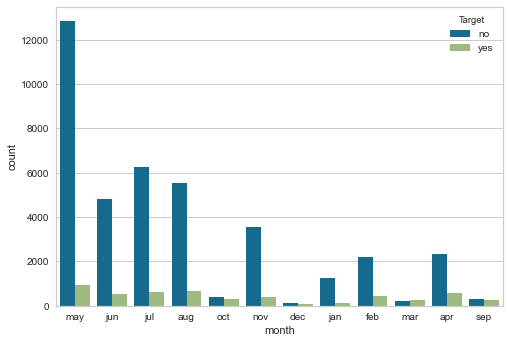

In [13]:
sns.countplot(x='month',data=data, hue='Target')

In [14]:
data.groupby(by=['month', 'Target'])['Target'].count()

month  Target
apr    no         2355
       yes         577
aug    no         5559
       yes         688
dec    no          114
       yes         100
feb    no         2208
       yes         441
jan    no         1261
       yes         142
jul    no         6268
       yes         627
jun    no         4795
       yes         546
mar    no          229
       yes         248
may    no        12841
       yes         925
nov    no         3567
       yes         403
oct    no          415
       yes         323
sep    no          310
       yes         269
Name: Target, dtype: int64

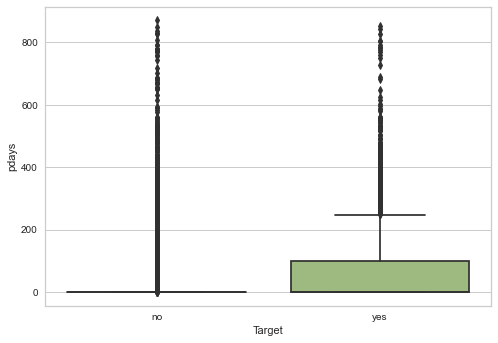

In [15]:
sns.boxplot(y=data['pdays'], x=data['Target'])

In [16]:
data.pdays.describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

- 75 % customers have not been contacted since 900 days or they were contacted beyond 900 days
- There are outliers

In [17]:
# Restructuring Target to Numerical
mapping={'yes':1, 'no':0}
data['Target']= data['Target'].replace(mapping)

In [18]:
custntcontacted=data[(data['pdays']== -1)]
custntcontacted.groupby(by=['pdays', 'Target'])['Target'].count()

pdays  Target
-1     0         33570
       1          3384
Name: Target, dtype: int64

In [19]:
print('Customer have Term deposit and not contacted =',custntcontacted.Target.sum())
print('Total Number of customers having Term Deposit=', data.Target.sum())
print('% of Customers not contacted and having Term Deposit =',(custntcontacted.Target.sum()/data.Target.sum())*100)

Customer have Term deposit and not contacted = 3384
Total Number of customers having Term Deposit= 5289
% of Customers not contacted and having Term Deposit = 63.98184912081679


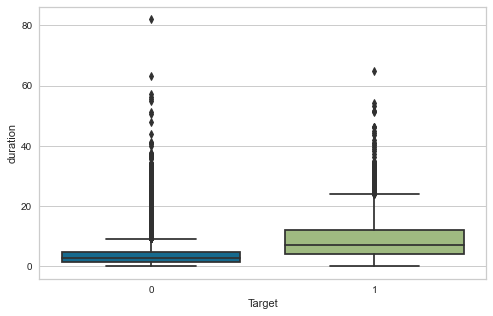

In [20]:
duration_min= data['duration']/60
fig=plt.figure(figsize=(8,5))
sns.boxplot(y=duration_min, x=data['Target'])


In [21]:
duration_min.describe()

count    45211.000000
mean         4.302718
std          4.292130
min          0.000000
25%          1.716667
50%          3.000000
75%          5.316667
max         81.966667
Name: duration, dtype: float64

- 75% customers contact duration is upto 5.3 minutes

In [22]:
data.groupby(by=['job','Target'])['Target'].count()

job            Target
admin.         0         4540
               1          631
blue-collar    0         9024
               1          708
entrepreneur   0         1364
               1          123
housemaid      0         1131
               1          109
management     0         8157
               1         1301
retired        0         1748
               1          516
self-employed  0         1392
               1          187
services       0         3785
               1          369
student        0          669
               1          269
technician     0         6757
               1          840
unemployed     0         1101
               1          202
unknown        0          254
               1           34
Name: Target, dtype: int64

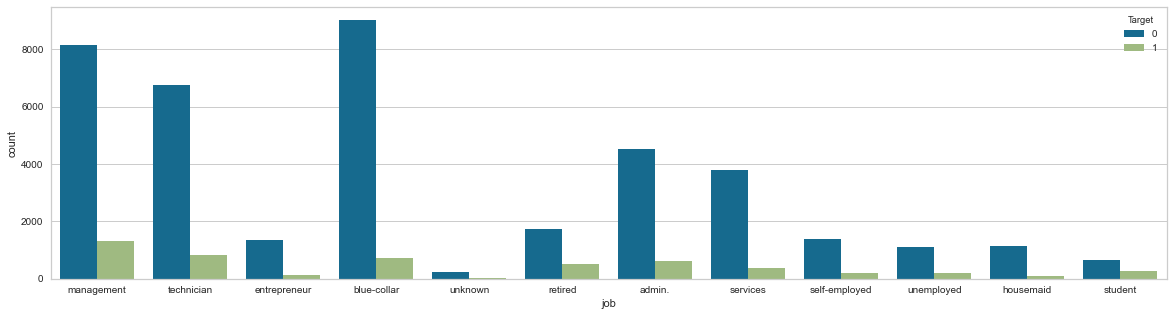

In [23]:
fig=plt.figure(figsize=(20,5))
sns.countplot(x='job', hue='Target', data=data)

- More no of customers taking Term Deposit are from Management, Technician,Retired, Blue Collar

In [24]:
j=data['job'].unique()
for i in j:
    print('Success Ratio in ',i,'\t',data[data['job'] == i]['Target'].value_counts()[1]/len(data[data['job'] == i]))

Success Ratio in  management 	 0.13755550856417847
Success Ratio in  technician 	 0.11056996182703699
Success Ratio in  entrepreneur 	 0.08271687962340282
Success Ratio in  blue-collar 	 0.07274969173859433
Success Ratio in  unknown 	 0.11805555555555555
Success Ratio in  retired 	 0.22791519434628976
Success Ratio in  admin. 	 0.12202668729452718
Success Ratio in  services 	 0.08883004333172845
Success Ratio in  self-employed 	 0.11842938568714376
Success Ratio in  unemployed 	 0.15502686108979277
Success Ratio in  housemaid 	 0.08790322580645162
Success Ratio in  student 	 0.2867803837953092


In [25]:
for i in j:
    print('% of Customer in ',i, ' Sector is \t',len(data[data['job']==i])/len(data['job']))

% of Customer in  management  Sector is 	 0.20919687686624935
% of Customer in  technician  Sector is 	 0.16803432792904383
% of Customer in  entrepreneur  Sector is 	 0.03289022582999712
% of Customer in  blue-collar  Sector is 	 0.21525734887527373
% of Customer in  unknown  Sector is 	 0.006370131162770122
% of Customer in  retired  Sector is 	 0.05007630886288735
% of Customer in  admin.  Sector is 	 0.11437482028709828
% of Customer in  services  Sector is 	 0.09188029461856628
% of Customer in  self-employed  Sector is 	 0.03492512884032647
% of Customer in  unemployed  Sector is 	 0.028820419809338436
% of Customer in  housemaid  Sector is 	 0.027426953617482472
% of Customer in  student  Sector is 	 0.02074716330096658


- Success Ratio in Students and retired are higher

In [26]:
j=data['month'].unique()
for i in j:
    print('no of Customer in ',i,' Month is ', len(data[data['month']==i]),'& Success Ratio is',data[data['month'] == i]['Target'].value_counts()[1]/len(data[data['month'] == i]))

no of Customer in  may  Month is  13766 & Success Ratio is 0.06719453726572715
no of Customer in  jun  Month is  5341 & Success Ratio is 0.10222804718217562
no of Customer in  jul  Month is  6895 & Success Ratio is 0.09093546047860769
no of Customer in  aug  Month is  6247 & Success Ratio is 0.11013286377461182
no of Customer in  oct  Month is  738 & Success Ratio is 0.43766937669376693
no of Customer in  nov  Month is  3970 & Success Ratio is 0.10151133501259446
no of Customer in  dec  Month is  214 & Success Ratio is 0.4672897196261682
no of Customer in  jan  Month is  1403 & Success Ratio is 0.10121168923734854
no of Customer in  feb  Month is  2649 & Success Ratio is 0.1664779161947905
no of Customer in  mar  Month is  477 & Success Ratio is 0.519916142557652
no of Customer in  apr  Month is  2932 & Success Ratio is 0.19679399727148705
no of Customer in  sep  Month is  579 & Success Ratio is 0.46459412780656306


- Number of customers are more in May but success ratio is less

Text(0.5, 1.0, 'PDF of age for target variable ')

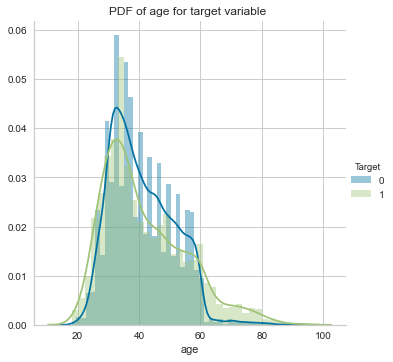

In [27]:
sns.FacetGrid(data, hue='Target', size=5).map(sns.distplot,'age').add_legend()
plt.title('PDF of age for target variable ')

- It seems maximum no of customers having Term Deposit are in range of 30 -50 yrs

Text(0.5, 1.0, 'Count plot of education for target variable ')

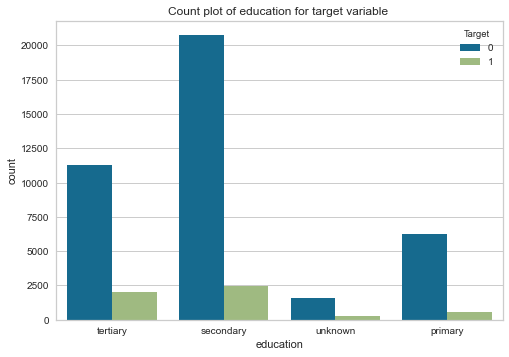

In [28]:
sns.countplot(x=data['education'], data=data, hue=data['Target'])
plt.title('Count plot of education for target variable ')

- Most customers are from Tertiary and Secondary Education Background

Text(0.5, 1.0, 'Count plot of loan for target variable')

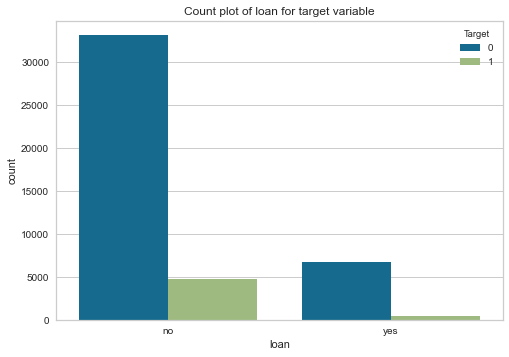

In [29]:
sns.countplot(x=data['loan'], data=data, hue=data['Target'])
plt.title('Count plot of loan for target variable')

- Customers having no loan have more Term Deposits

Text(0.5, 1.0, 'Count plot of loan for target variable')

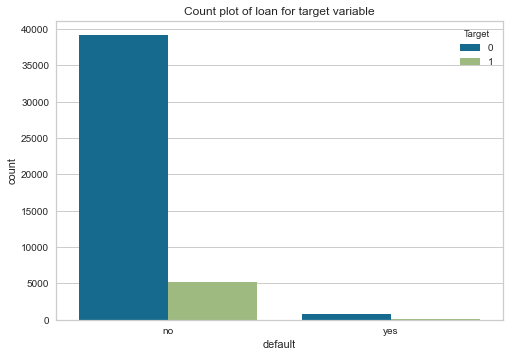

In [30]:
sns.countplot(x=data['default'], data=data, hue=data['Target'])
plt.title('Count plot of loan for target variable')

- Customers having no default have more Term Deposits

Text(0.5, 1.0, 'Count plot of contact for target variable ')

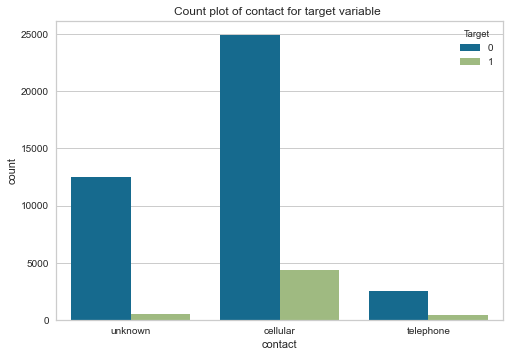

In [31]:
sns.countplot(x=data['contact'], data=data, hue=data['Target'])
plt.title('Count plot of contact for target variable ')

- Most of the customers having Term Deposit were contacted through Cellular Mode

# Multivariate Analysis

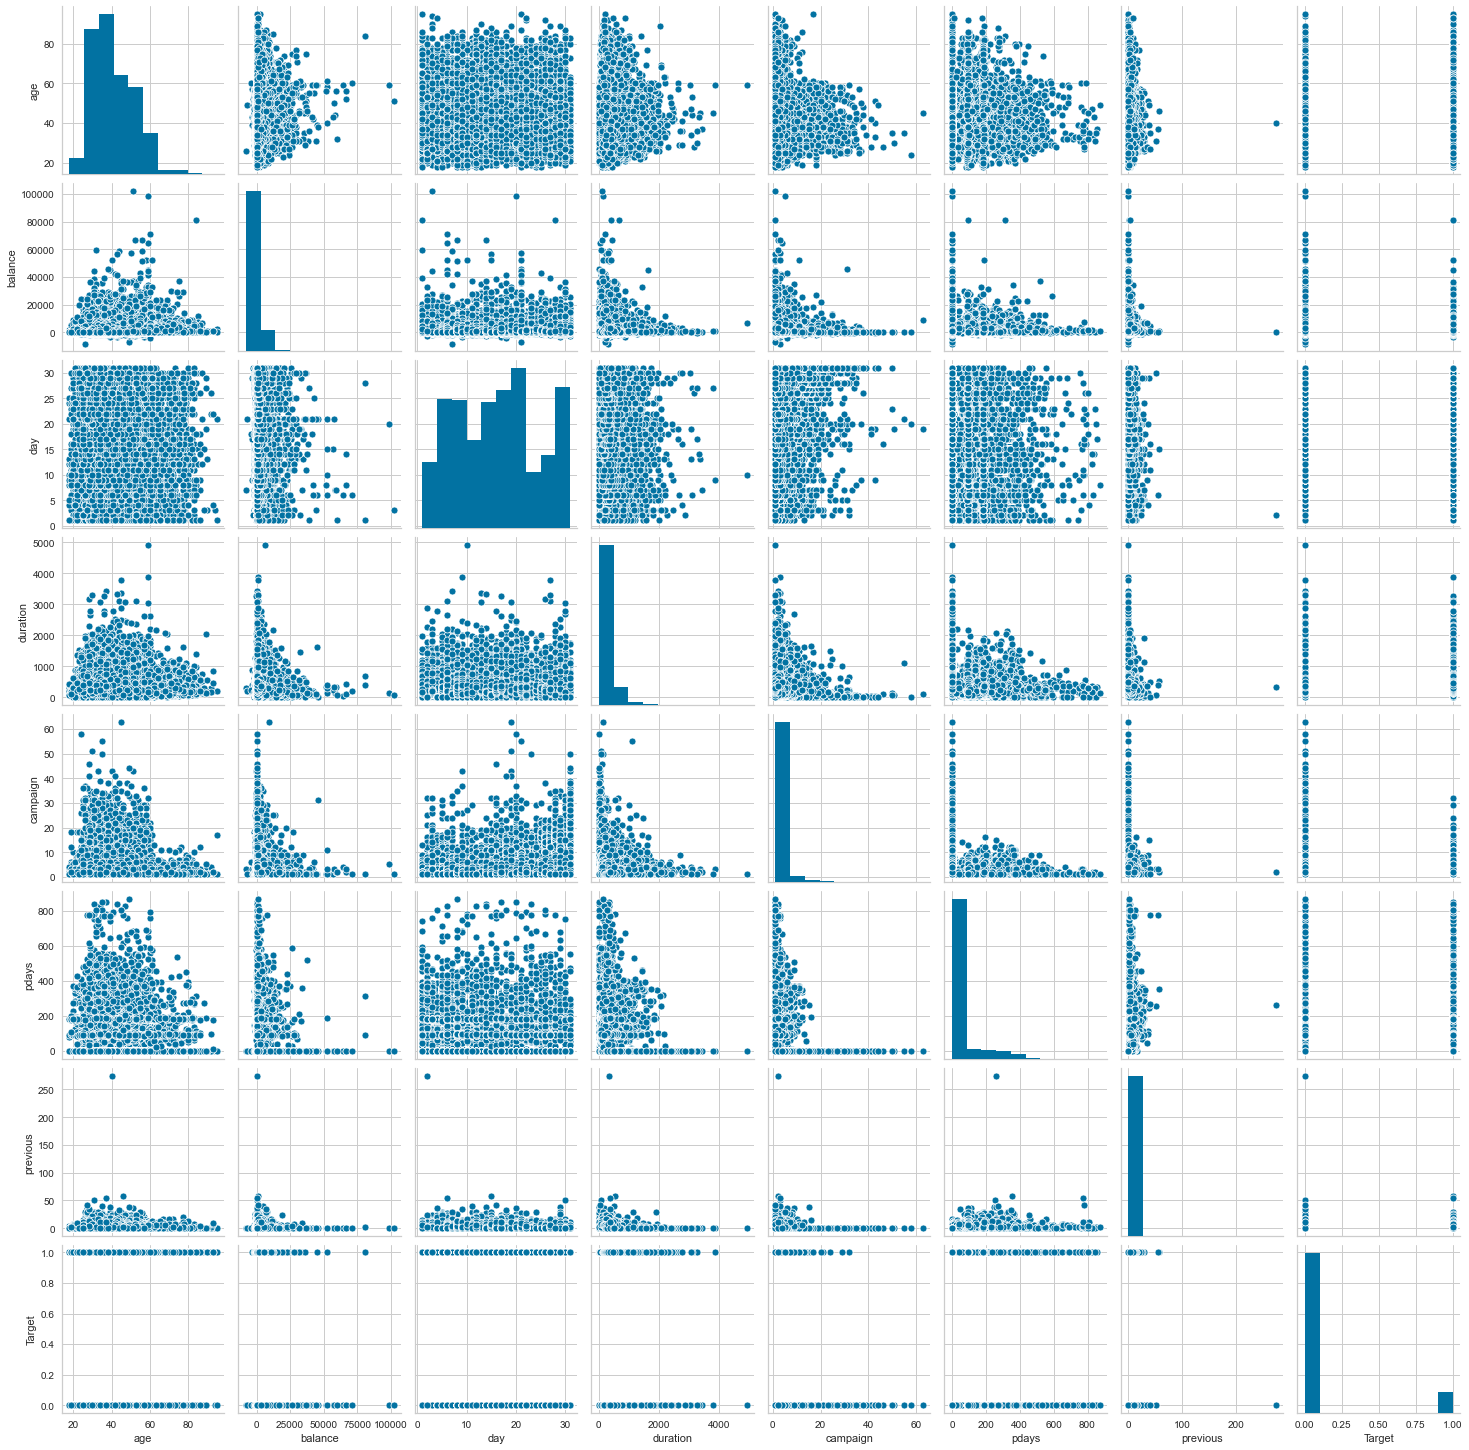

In [32]:
# Plotting Pairplot 
sns.pairplot(data)

In [33]:
data.corr()

,age,balance,day,duration,campaign,pdays,previous,Target
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,0.052838
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.028348
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.394521
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.073172
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.103621
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.093236
Target,0.025155,0.052838,-0.028348,0.394521,-0.073172,0.103621,0.093236,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

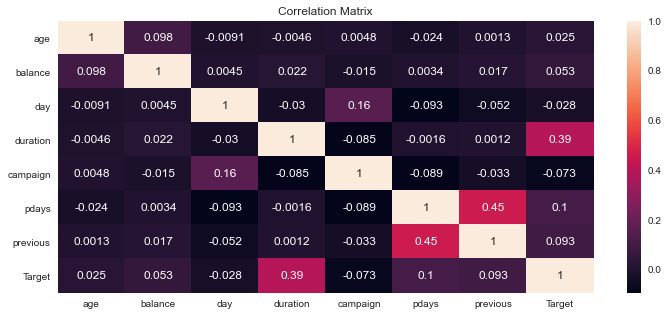

In [34]:
fig=plt.figure(figsize=(12,5))
sns.heatmap(data.corr(), annot=True)
plt.title('Correlation Matrix')

- duration is highly corelated
- pdays are also highly corelated
- previous is also highly corelated


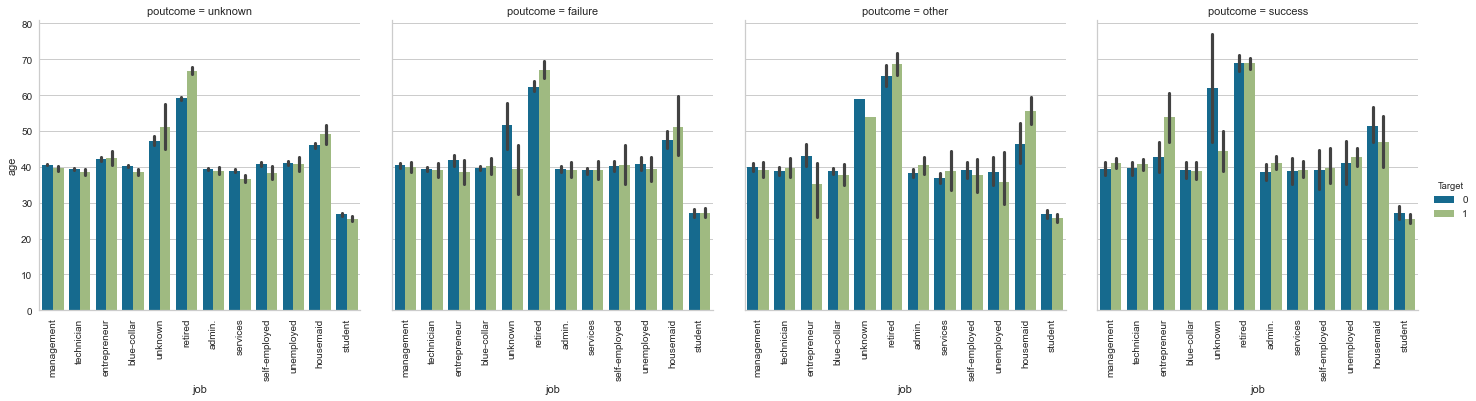

In [35]:
catplot=sns.catplot(x='job', y='age',
            hue='Target',col='poutcome',
            data=data, kind='bar')
catplot.set_xticklabels(rotation=90)


# Preprocessing

In [36]:
# Restructuring Month Attribute 
map_mnth={'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6,
         'jul':7, 'aug':8, 'sep':9,'oct':10, 'nov':11, 'dec':12}

data['month']= data['month'].replace(map_mnth)

map_edu={'unknown':0 ,'primary':1, 'secondary':2,'tertiary':3}
data['education']= data['education'].replace(map_edu)

## Encoding Categorical Variable

In [37]:
from sklearn import preprocessing

def encoder_features(df):
    features = ['job','marital','default','housing','loan','contact','poutcome']
    for feature in features:
        le= preprocessing.LabelEncoder()
        le= le.fit(df[feature])
        df[feature]= le.transform(df[feature])
    return df

In [38]:
data= encoder_features(data)

In [39]:
# Convert the columns into categorical variables
# this is one way to convert into categorical variables

# data['job']       = data['job'].astype('category').cat.codes
# data['marital']   = data['marital'].astype('category').cat.codes
# data['education'] = data['education'].astype('category').cat.codes
# data['contact']   = data['contact'].astype('category').cat.codes
# data['poutcome']  = data['poutcome'].astype('category').cat.codes
# data['month']     = data['month'].astype('category').cat.codes
# data['default']   = data['default'].astype('category').cat.codes
# data['loan']      = data['loan'].astype('category').cat.codes
# data['housing']   = data['housing'].astype('category').cat.codes

In [40]:
# Encoding different Numerical data using Normalizer() function

# from sklearn.preprocessing import Normalizer
# norm = Normalizer()
# data['duration'] = norm.fit_transform(data['duration'].values.reshape(1,-1)).transpose()
# data['age'] = norm.fit_transform(data['age'].values.reshape(1,-1)).transpose()
# data['balance'] = norm.fit_transform(data['balance'].values.reshape(1,-1)).transpose()
# data['pdays'] = norm.fit_transform(data['pdays'].values.reshape(1,-1)).transpose()

## Encoding Numerical variable using StandardScaler() function

In [41]:
# from sklearn.preprocessing import StandardScaler
scaler=preprocessing.StandardScaler()
data['duration'] = scaler.fit_transform(data[['duration']])
data['age'] = scaler.fit_transform(data[['age']])
data['balance'] = scaler.fit_transform(data[['balance']])
data['pdays'] = scaler.fit_transform(data[['pdays']])

In [42]:
X= data.drop(columns='Target')
y= data['Target']
Xtrain,Xtest,ytrain,ytest= train_test_split(X,y,test_size=0.3, random_state=7)

# Create the decision tree model using “entropy” method of finding the split columns and fit it to training data

In [43]:
from sklearn.tree import DecisionTreeClassifier
model_entropy = DecisionTreeClassifier(criterion='entropy')

In [44]:
model_entropy.fit(Xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [45]:
print("Train: %.2f" % model_entropy.score(Xtrain, ytrain))  # performance on train data
print("Test: %.2f" % model_entropy.score(Xtest, ytest))  # performance on test data

Train: 1.00
Test: 0.88


There is a high degree of overfitting in the model due to which the test accuracy drops drastically. This shows that decision trees are prone to overfitting.

Regularize/prune the decision tree by limiting the max. depth of trees and print the accuracy.

In [46]:
clf_pruned = DecisionTreeClassifier(criterion = "entropy", max_depth=5,min_samples_leaf=1)
clf_pruned.fit(Xtrain, ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# Decision tree performance

In [47]:
print("Train: %.2f" % clf_pruned.score(Xtrain, ytrain))  # performance on train data
print("Test: %.2f" % clf_pruned.score(Xtest, ytest))  # performance on test data

y_probs_train = clf_pruned.predict_proba(Xtrain)
y_probs_test = clf_pruned.predict_proba(Xtest)
y_predicted_train = clf_pruned.predict(Xtrain)
y_predicted_test = clf_pruned.predict(Xtest)

# keep probabilities for the positive outcome only
y_probs_train = y_probs_train[:, 1]
y_probs_test = y_probs_test[:, 1]

# calculate AUC and Accuracy
train_auc = roc_auc_score(ytrain, y_probs_train)
test_auc = roc_auc_score(ytest, y_probs_test)
train_acc = accuracy_score(ytrain, y_predicted_train)
test_acc = accuracy_score(ytest, y_predicted_test)
print()
print('Train AUC: %.3f' % train_auc)
print('Test AUC: %.3f' % test_auc)
print()
print('Train Accuracy: %.3f' % train_acc)
print('Test Accuracy: %.3f' % test_acc)

Train: 0.90
Test: 0.90

Train AUC: 0.888
Test AUC: 0.879

Train Accuracy: 0.900
Test Accuracy: 0.903


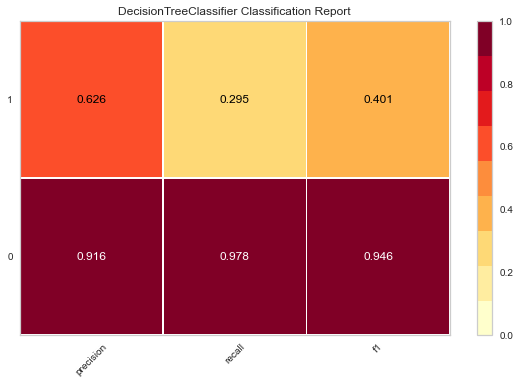

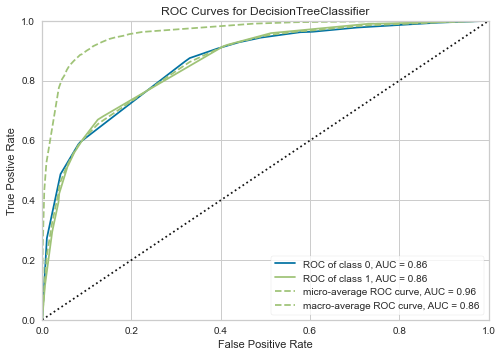

In [48]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(DecisionTreeClassifier(criterion = "entropy", max_depth=4))
viz.fit(Xtrain, ytrain)
viz.score(Xtest, ytest)
viz.show()

roc = ROCAUC(DecisionTreeClassifier(criterion = "entropy", max_depth=4))
roc.fit(Xtrain, ytrain)
roc.score(Xtest, ytest)
roc.show()

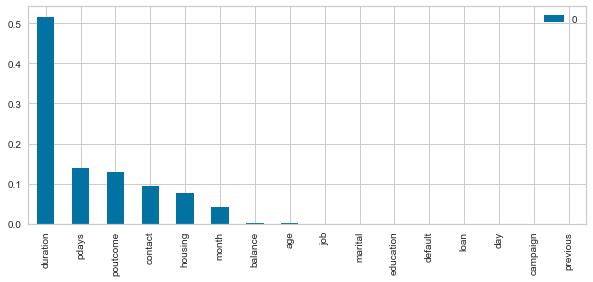

In [49]:
## Calculating feature importance

feat_importance = clf_pruned.tree_.compute_feature_importances(normalize=False)
feat_imp_dict = dict(zip(Xtrain.columns, clf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False, inplace=True)
feat_imp.plot.bar(figsize=(10,4))

- Follwoing attributes are of much importance
    - Duration
    - pdays
    - Poutcome
    - Contact
    - Housing
    - month
    - balance
    - age

In [50]:
# Decision Tree Accuracy

preds_train = clf_pruned.predict(Xtrain)
preds_test = clf_pruned.predict(Xtest)
acc_DT = accuracy_score(ytest, preds_test)

In [51]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Decision Tree'], 'Accuracy': [acc_DT],
                          'Train AUC':[train_auc] , 'Test AUC':[test_auc],
                          'Train Accuracy':[train_acc],'Test Accuracy':[test_acc]})
resultsDf = resultsDf[['Method', 'Accuracy','Train AUC','Test AUC','Train Accuracy','Test Accuracy']]
resultsDf

,Method,Accuracy,Train AUC,Test AUC,Train Accuracy,Test Accuracy
0,Decision Tree,0.903052,0.888387,0.879371,0.900275,0.903052


Encoding Categorical Features using get_dummies()

In [52]:
data= pd.get_dummies(data, columns=['job', 'marital', 'education','month', 'default','housing',
       'loan', 'contact', 'poutcome'],drop_first=True)

In [53]:
X= data.drop(columns='Target')
y= data['Target']

In [54]:
Xtrain,Xtest,ytrain,ytest= train_test_split(X,y,test_size=0.3, random_state=7)

# Model building using Logistic Regression from Sklearn¶
Using the sklearn library to build the model and make predictions

In [55]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
# or from sklearn import metrics
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=7, solver='liblinear', class_weight='balanced', C= 0.75)
logreg.fit(Xtrain, ytrain)

LogisticRegression(C=0.75, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
y_predict = logreg.predict(Xtest)

In [57]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Trainig accuracy is : 0.843808259866654

Testing accuracy is : 0.8462842819227366

Confusion Matrix


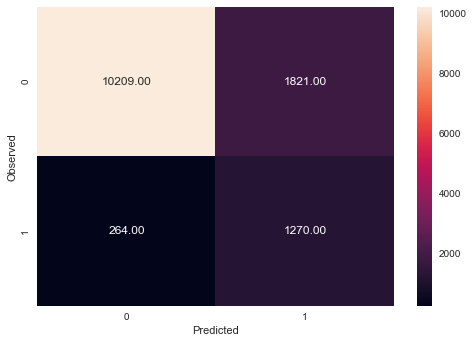

None

Recall is    : 0.8279009126466753

Precision is : 0.4108702685215141

F1 Score is  : 0.5491891891891891

Roc Auc Score: 0.838264670787178


In [58]:
print("Trainig accuracy is :",logreg.score(Xtrain,ytrain))  
print()
print("Testing accuracy is :",logreg.score(Xtest, ytest))
print()
print('Confusion Matrix')
print(draw_cm(ytest,y_predict))
print()
print("Recall is    :",recall_score(ytest,y_predict))
print()
print("Precision is :",precision_score(ytest,y_predict))
print()
print("F1 Score is  :",f1_score(ytest,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(ytest,y_predict))

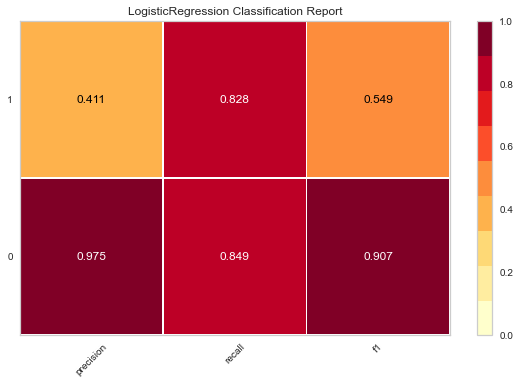

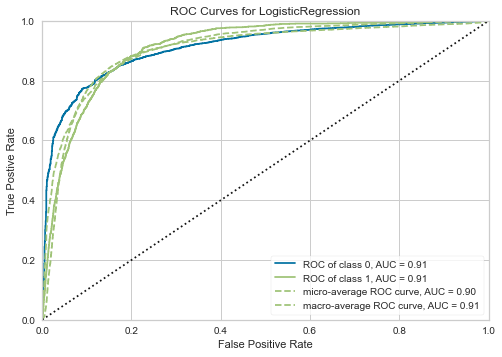

In [59]:
from yellowbrick.classifier import ClassificationReport, ROCAUC
# Visualize model performance with yellowbrick library
viz = ClassificationReport(logreg)
viz.fit(Xtrain, ytrain)
viz.score(Xtest, ytest)
viz.show()

roc = ROCAUC(logreg)
roc.fit(Xtrain, ytrain)
roc.score(Xtest, ytest)
roc.show()

In [60]:
y_probs_train = logreg.predict_proba(Xtrain)
y_probs_test = logreg.predict_proba(Xtest)
y_predicted_train = logreg.predict(Xtrain)
y_predicted_test = logreg.predict(Xtest)

# keep probabilities for the positive outcome only
y_probs_train = y_probs_train[:, 1]
y_probs_test = y_probs_test[:, 1]

# calculate AUC and Accuracy
train_auc = roc_auc_score(ytrain, y_probs_train)
test_auc = roc_auc_score(ytest, y_probs_test)
train_acc = accuracy_score(ytrain, y_predicted_train)
test_acc = accuracy_score(ytest, y_predicted_test)
print()
print('Train AUC: %.3f' % train_auc)
print('Test AUC: %.3f' % test_auc)
print()
print('Train Accuracy: %.3f' % train_acc)
print('Test Accuracy: %.3f' % test_acc)


Train AUC: 0.910
Test AUC: 0.913

Train Accuracy: 0.844
Test Accuracy: 0.846


In [61]:
# Logistic Regression Accuracy

preds_train = logreg.predict(Xtrain)
preds_test = logreg.predict(Xtest)
acc_LR = accuracy_score(ytest, preds_test)

In [62]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Logistic Regression'], 'Accuracy': [acc_LR],
                          'Train AUC':[train_auc] , 'Test AUC':[test_auc],
                          'Train Accuracy':[train_acc],'Test Accuracy':[test_acc]})
resultsDf = pd.concat([resultsDf,tempResultsDf])
resultsDf = resultsDf[['Method', 'Accuracy','Train AUC','Test AUC','Train Accuracy','Test Accuracy']]
resultsDf

,Method,Accuracy,Train AUC,Test AUC,Train Accuracy,Test Accuracy
0,Decision Tree,0.903052,0.888387,0.879371,0.900275,0.903052
0,Logistic Regression,0.846284,0.910273,0.912561,0.843808,0.846284


# Apply the Random forest model and print the accuracy of Random forest Model¶

In [63]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 100,min_samples_leaf=1, max_depth=3)
rfcl = rfcl.fit(Xtrain, ytrain)

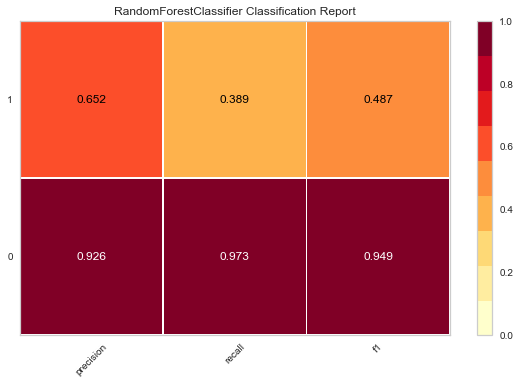

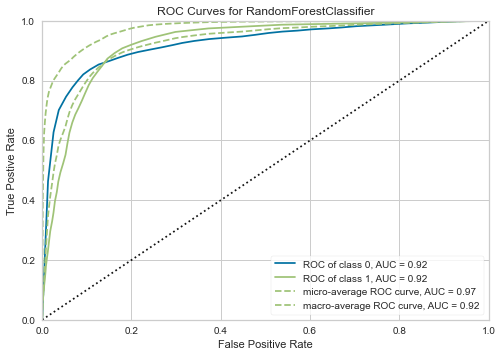

In [64]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(RandomForestClassifier(n_estimators = 50))
viz.fit(Xtrain, ytrain)
viz.score(Xtest, ytest)
viz.show()

roc = ROCAUC(RandomForestClassifier(n_estimators = 50))
roc.fit(Xtrain, ytrain)
roc.score(Xtest, ytest)
roc.show()

In [65]:
pred_RF = rfcl.predict(Xtest)
acc_RF = accuracy_score(ytest, pred_RF)

In [66]:
y_probs_train = rfcl.predict_proba(Xtrain)
y_probs_test = rfcl.predict_proba(Xtest)
y_predicted_train = rfcl.predict(Xtrain)
y_predicted_test = rfcl.predict(Xtest)

# keep probabilities for the positive outcome only
y_probs_train = y_probs_train[:, 1]
y_probs_test = y_probs_test[:, 1]

# calculate AUC and Accuracy
train_auc = roc_auc_score(ytrain, y_probs_train)
test_auc = roc_auc_score(ytest, y_probs_test)
train_acc = accuracy_score(ytrain, y_predicted_train)
test_acc = accuracy_score(ytest, y_predicted_test)
print()
print('Train AUC: %.3f' % train_auc)
print('Test AUC: %.3f' % test_auc)
print()
print('Train Accuracy: %.3f' % train_acc)
print('Test Accuracy: %.3f' % test_acc)


Train AUC: 0.887
Test AUC: 0.883

Train Accuracy: 0.882
Test Accuracy: 0.887


Confusion Matrix


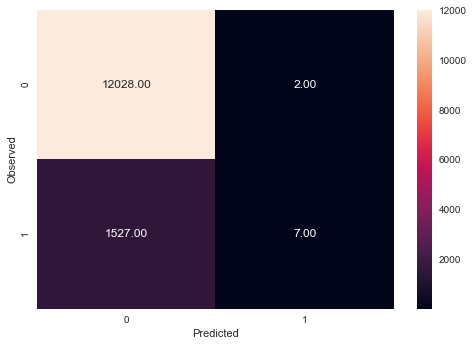

None


In [67]:
print('Confusion Matrix')
print(draw_cm(ytest,y_predicted_test))

In [68]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'Accuracy': [acc_RF],
                          'Train AUC':[train_auc] , 'Test AUC':[test_auc],
                          'Train Accuracy':[train_acc],'Test Accuracy':[test_acc]})
resultsDf = pd.concat([resultsDf,tempResultsDf])
resultsDf = resultsDf[['Method', 'Accuracy','Train AUC','Test AUC','Train Accuracy','Test Accuracy']]
resultsDf

,Method,Accuracy,Train AUC,Test AUC,Train Accuracy,Test Accuracy
0,Decision Tree,0.903052,0.888387,0.879371,0.900275,0.903052
0,Logistic Regression,0.846284,0.910273,0.912561,0.843808,0.846284
0,Random Forest,0.887275,0.887155,0.882737,0.881821,0.887275


# Building Ensemble Models

## Apply AdaBoost Ensemble Algorithm and checking the accuracy.

In [69]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators = 50, learning_rate=0.1, random_state=7)
abcl = abcl.fit(Xtrain, ytrain)

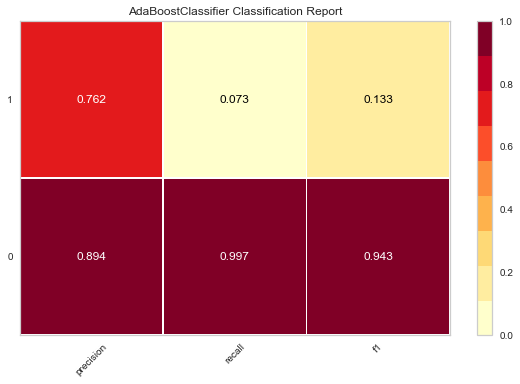

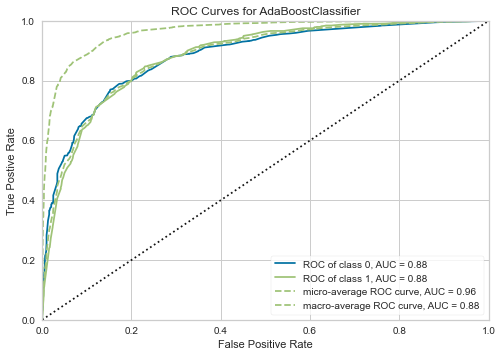

In [70]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(AdaBoostClassifier(n_estimators= 50, learning_rate=0.1, random_state=7))
viz.fit(Xtrain, ytrain)
viz.score(Xtest, ytest)
viz.show()

roc = ROCAUC(AdaBoostClassifier(n_estimators= 50, learning_rate=0.1, random_state=7))
roc.fit(Xtrain, ytrain)
roc.score(Xtest, ytest)
roc.show()

In [71]:
predict_abcl= abcl.predict(Xtest)
acc_abcl= accuracy_score(ytest, predict_abcl)

In [72]:
y_probs_train = abcl.predict_proba(Xtrain)
y_probs_test = abcl.predict_proba(Xtest)
y_predicted_train = abcl.predict(Xtrain)
y_predicted_test = abcl.predict(Xtest)

# keep probabilities for the positive outcome only
y_probs_train = y_probs_train[:, 1]
y_probs_test = y_probs_test[:, 1]

# calculate AUC and Accuracy
train_auc = roc_auc_score(ytrain, y_probs_train)
test_auc = roc_auc_score(ytest, y_probs_test)
train_acc = accuracy_score(ytrain, y_predicted_train)
test_acc = accuracy_score(ytest, y_predicted_test)
print()
print('Train AUC: %.3f' % train_auc)
print('Test AUC: %.3f' % test_auc)
print()
print('Train Accuracy: %.3f' % train_acc)
print('Test Accuracy: %.3f' % test_acc)


Train AUC: 0.885
Test AUC: 0.882

Train Accuracy: 0.888
Test Accuracy: 0.893


Confusion Matrix


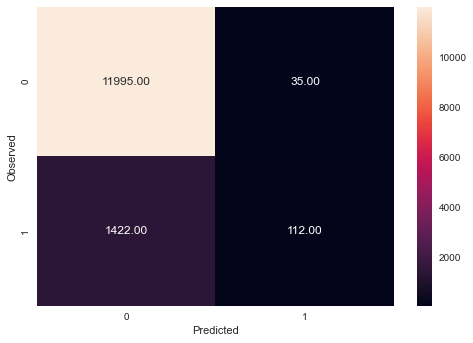

None


In [73]:
print('Confusion Matrix')
print(draw_cm(ytest,y_predicted_test))

In [74]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Ada Boosting'], 'Accuracy': [acc_abcl],
                          'Train AUC':[train_auc] , 'Test AUC':[test_auc],
                          'Train Accuracy':[train_acc],'Test Accuracy':[test_acc]})
resultsDf = pd.concat([resultsDf,tempResultsDf])
resultsDf = resultsDf[['Method', 'Accuracy','Train AUC','Test AUC','Train Accuracy','Test Accuracy']]
resultsDf

,Method,Accuracy,Train AUC,Test AUC,Train Accuracy,Test Accuracy
0,Decision Tree,0.903052,0.888387,0.879371,0.900275,0.903052
0,Logistic Regression,0.846284,0.910273,0.912561,0.843808,0.846284
0,Random Forest,0.887275,0.887155,0.882737,0.881821,0.887275
0,Ada Boosting,0.892583,0.885432,0.882468,0.888141,0.892583


## Apply Bagging Ensemble Algorithm and checking the accuracy.

In [75]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(n_estimators=50, max_samples= .5, max_features=1,bootstrap=True, oob_score=True, random_state=7)
bgcl = bgcl.fit(Xtrain, ytrain)

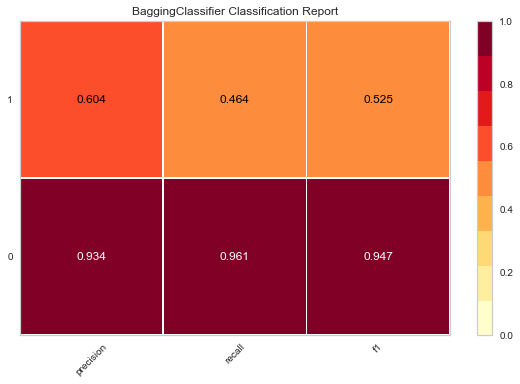

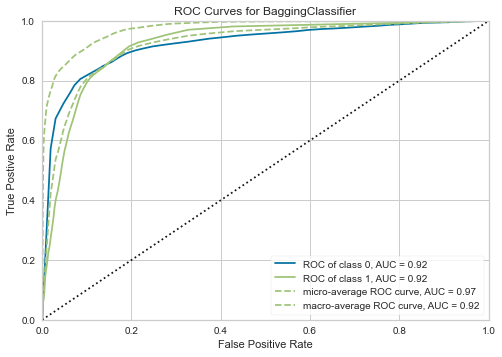

In [76]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=7))
viz.fit(Xtrain, ytrain)
viz.score(Xtest, ytest)
viz.show()

roc = ROCAUC(BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=7))
roc.fit(Xtrain, ytrain)
roc.score(Xtest, ytest)
roc.show()

In [77]:
predict_bgcl= bgcl.predict(Xtest)
acc_bgcl = accuracy_score(ytest, predict_bgcl)

In [78]:
y_probs_train = bgcl.predict_proba(Xtrain)
y_probs_test = bgcl.predict_proba(Xtest)
y_predicted_train = bgcl.predict(Xtrain)
y_predicted_test = bgcl.predict(Xtest)

# keep probabilities for the positive outcome only
y_probs_train = y_probs_train[:, 1]
y_probs_test = y_probs_test[:, 1]

# calculate AUC and Accuracy
train_auc = roc_auc_score(ytrain, y_probs_train)
test_auc = roc_auc_score(ytest, y_probs_test)
train_acc = accuracy_score(ytrain, y_predicted_train)
test_acc = accuracy_score(ytest, y_predicted_test)
print()
print('Train AUC: %.3f' % train_auc)
print('Test AUC: %.3f' % test_auc)
print()
print('Train Accuracy: %.3f' % train_acc)
print('Test Accuracy: %.3f' % test_acc)


Train AUC: 0.796
Test AUC: 0.737

Train Accuracy: 0.881
Test Accuracy: 0.887


Confusion Matrix


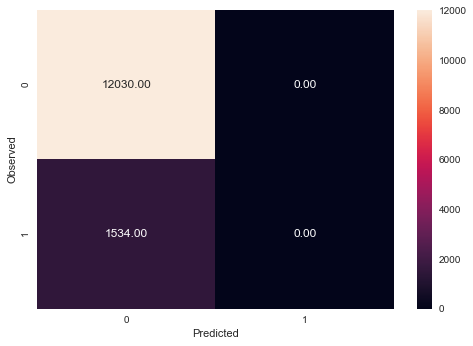

None


In [79]:
print('Confusion Matrix')
print(draw_cm(ytest,y_predicted_test))

In [80]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Bagging Classifier'], 'Accuracy': [acc_bgcl],
                          'Train AUC':[train_auc] , 'Test AUC':[test_auc],
                          'Train Accuracy':[train_acc],'Test Accuracy':[test_acc]})
resultsDf = pd.concat([resultsDf,tempResultsDf])
resultsDf = resultsDf[['Method', 'Accuracy','Train AUC','Test AUC','Train Accuracy','Test Accuracy']]
resultsDf

,Method,Accuracy,Train AUC,Test AUC,Train Accuracy,Test Accuracy
0,Decision Tree,0.903052,0.888387,0.879371,0.900275,0.903052
0,Logistic Regression,0.846284,0.910273,0.912561,0.843808,0.846284
0,Random Forest,0.887275,0.887155,0.882737,0.881821,0.887275
0,Ada Boosting,0.892583,0.885432,0.882468,0.888141,0.892583
0,Bagging Classifier,0.886907,0.795857,0.737207,0.881347,0.886907


## Apply GradientBoost Classifier Algorithm and checking the accuracy

In [81]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=7)
gbcl = gbcl.fit(Xtrain, ytrain)

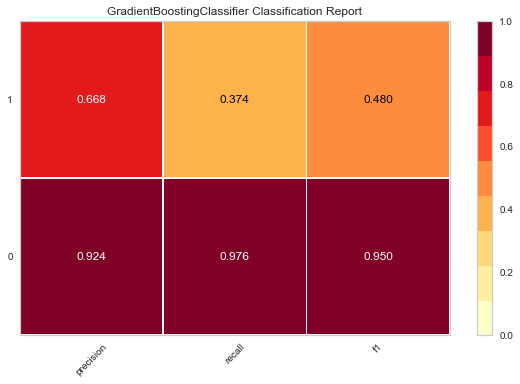

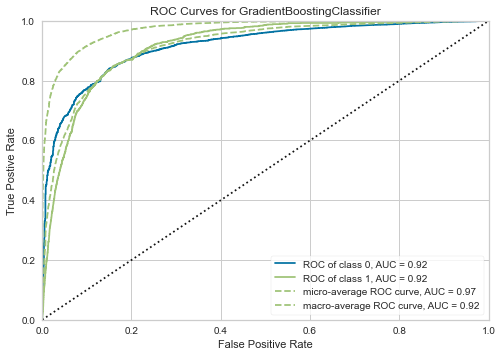

In [82]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=7))
viz.fit(Xtrain, ytrain)
viz.score(Xtest, ytest)
viz.show()

roc = ROCAUC(GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=7))
roc.fit(Xtrain, ytrain)
roc.score(Xtest, ytest)
roc.show()

In [83]:
predict_gbcl= gbcl.predict(Xtest)
acc_gbcl = accuracy_score(ytest, predict_gbcl)

In [84]:
y_probs_train = gbcl.predict_proba(Xtrain)
y_probs_test = gbcl.predict_proba(Xtest)
y_predicted_train = gbcl.predict(Xtrain)
y_predicted_test = gbcl.predict(Xtest)

# keep probabilities for the positive outcome only
y_probs_train = y_probs_train[:, 1]
y_probs_test = y_probs_test[:, 1]

# calculate AUC and Accuracy
train_auc = roc_auc_score(ytrain, y_probs_train)
test_auc = roc_auc_score(ytest, y_probs_test)
train_acc = accuracy_score(ytrain, y_predicted_train)
test_acc = accuracy_score(ytest, y_predicted_test)
print()
print('Train AUC: %.3f' % train_auc)
print('Test AUC: %.3f' % test_auc)
print()
print('Train Accuracy: %.3f' % train_acc)
print('Test Accuracy: %.3f' % test_acc)


Train AUC: 0.923
Test AUC: 0.916

Train Accuracy: 0.906
Test Accuracy: 0.908


Confusion Matrix


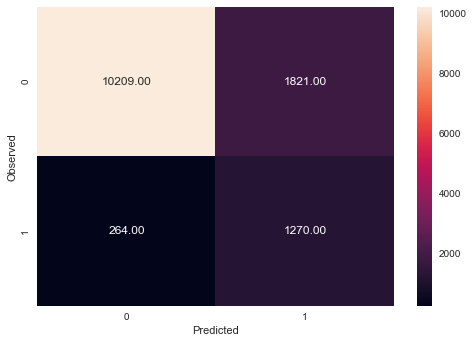

None


In [85]:
print('Confusion Matrix')
print(draw_cm(ytest,y_predict))

In [86]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Gradient Boosting'], 'Accuracy': [acc_gbcl],
                          'Train AUC':[train_auc] , 'Test AUC':[test_auc],
                          'Train Accuracy':[train_acc],'Test Accuracy':[test_acc]})
resultsDf = pd.concat([resultsDf,tempResultsDf])
resultsDf = resultsDf[['Method', 'Accuracy','Train AUC','Test AUC','Train Accuracy','Test Accuracy']]


In [87]:
print('Comparision of Accuracy of Different Models')
resultsDf

Comparision of Accuracy of Different Models


,Method,Accuracy,Train AUC,Test AUC,Train Accuracy,Test Accuracy
0,Decision Tree,0.903052,0.888387,0.879371,0.900275,0.903052
0,Logistic Regression,0.846284,0.910273,0.912561,0.843808,0.846284
0,Random Forest,0.887275,0.887155,0.882737,0.881821,0.887275
0,Ada Boosting,0.892583,0.885432,0.882468,0.888141,0.892583
0,Bagging Classifier,0.886907,0.795857,0.737207,0.881347,0.886907
0,Gradient Boosting,0.908213,0.923028,0.916438,0.906057,0.908213


## Summary
- Different model has been used for Training and testing.
- Looking to features_importances, we can say some attributes are not contributing much.
- It looks Logistic Regression performs well as there are not overfitting and Train score is also good
- There can be Hyper parameters tuning be done in order to enhance the model as best as possible.